**Pyber Ride Sharing**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import cycle
import matplotlib.patches as mpatches

In [27]:
city = pd.read_csv('Resources/city_data.csv', low_memory=False)
rides = pd.read_csv('Resources/ride_data.csv', low_memory=False)

**Create an organized DF from the city file and get Total Number of Drivers Per City and
City Type (Urban, Suburban, Rural)**

In [28]:
city_group = city.groupby(['city', 'type'])
city_group_df = city_group.sum()
struct_city = city_group_df.reset_index()
#struct_city.head()

**Get Average Fare ($) Per City**

In [29]:
rides_gr = rides.groupby('city')
fare_df = rides_gr.mean()
fare_df.drop('ride_id', axis=1, inplace=True)
fare = fare_df.reset_index()
#fare.head()

**Get Total Number of Rides Per City**

In [30]:
total_rides = rides_gr.count()
total_rides.drop('fare', axis=1, inplace=True)
total_rides.drop('date', axis=1, inplace=True)
tot_rides = total_rides.reset_index()
#tot_rides.head()

**Merge all 3 DF in one**

In [31]:
merge1 = pd.merge(struct_city, fare, on='city')
allmerged = pd.merge(merge1, tot_rides, on='city')
allmerged.drop('city', axis=1, inplace=True)
allmerged.columns = ['City Type', 'Driver Count', 'Average Fare ($)', 'Total Number of Rides (Per City)']
#allmerged['Average Fare'] = allmerged['Average Fare'].map("{:,.2f}".format)

In [32]:
# Create a copy to do whatever I want with it
forplot = allmerged.copy()
forplot.head()

,City Type,Driver Count,Average Fare ($),Total Number of Rides (Per City)
0,Urban,21,23.928710,31
1,Urban,67,20.609615,26
2,Suburban,16,37.315556,9
3,Urban,21,23.625000,22
4,Urban,49,21.981579,19


**Create a Bubble Plot**

In [58]:
# Create a dict City Type: color. Can be used for any numer of types, just need to add new colors in colorcycle.
citytype = {}
# Use cycle() to iterate through colors,  colors can be easily added, changed and modified
colorcycle = cycle(['#87cefa', '#f08080', '#FFD700'])
for i in range(len(forplot['City Type'])):
    citytype[forplot['City Type'][i]] = next(colorcycle)
    
# Create a list of colors, will be used in plot to coloring different city types
colors = []
for i in forplot['City Type']:
    if i in citytype:
        colors.append(citytype[i])

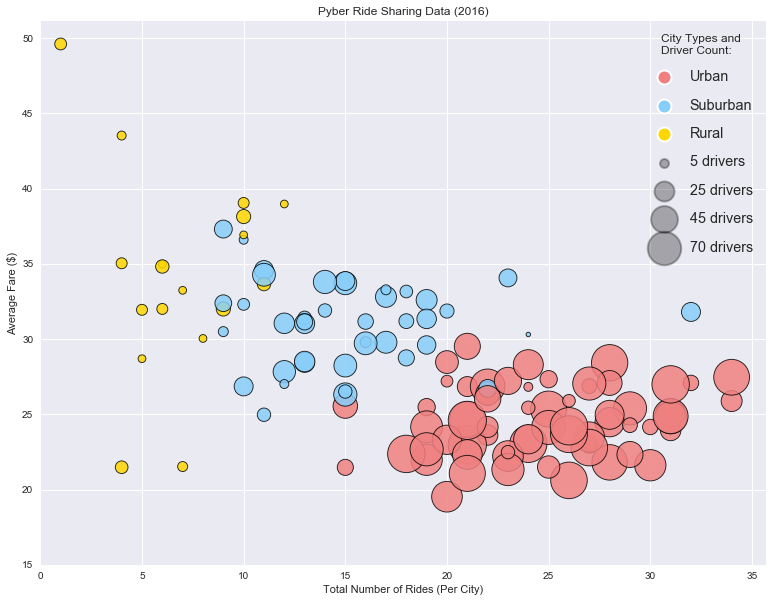

In [61]:
# Set seaborn grey style
sns.set()
# Create a plot
drcount = forplot['Driver Count']
forplot.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=drcount*20,
                        c=colors, alpha=0.85, edgecolors="black", linewidth=0.9, figsize=(13,10),
                       title='Pyber Ride Sharing Data (2016)')
plt.ylim(15, None)
plt.xlim(0, None)

# Create a legend, that consists of 2 parts: City type and Driver count per city
for key in citytype:
    plt.scatter([],[], color=citytype[key], label=key, marker='o', edgecolor='white', linewidth=2)
for drcount in [5,25,45,70]:
    plt.scatter([], [], c='k', alpha=0.3, s=drcount*4, label=str(drcount) + ' drivers', edgecolor='black', linewidth=2)
plt.legend(scatterpoints=1, markerscale=2, loc=1, fontsize='large', labelspacing=1, title='City Types and\nDriver Count:')

**Total Fares by City Type**

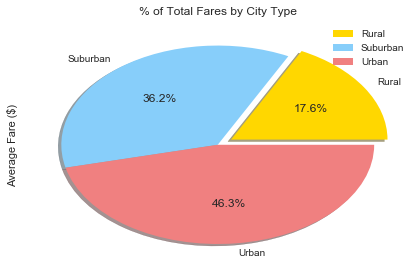

In [42]:
onemorecopy = allmerged.copy()
forpies = onemorecopy.groupby('City Type')
pie_df = forpies.sum()
# Find values < 20% for Explode
explode_f = []
for item in pie_df['Average Fare ($)']:
    if (item/(pie_df['Average Fare ($)']).sum()*100) < 20:
        explode_f.append(0.1)
    else:
        explode_f.append(0.0)
# Make a pie

farebysity = pie_df.plot(kind='pie', y= 'Average Fare ($)', title=('% of Total Fares by City Type'),
                          colors=['#FFD700', '#87cefa', '#f08080'], autopct="%1.1f%%", shadow=True, startangle=360,
                          center=(0,0), explode = explode_f)
plt.tight_layout()

**Total Rides by City Type**

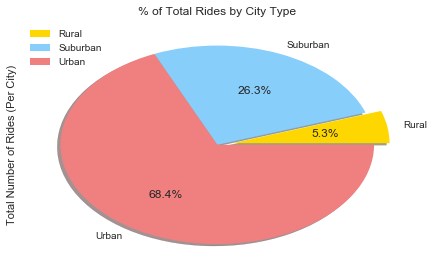

In [41]:
explode_r = []
for item in pie_df['Total Number of Rides (Per City)']:
    if (item/(pie_df['Total Number of Rides (Per City)']).sum()*100) < 20:
        explode_r.append(0.1)
    else:
        explode_r.append(0.0)

farebysity = pie_df.plot(kind='pie', y= 'Total Number of Rides (Per City)', title=('% of Total Rides by City Type'),
                          colors=['#FFD700', '#87cefa', '#f08080'], autopct="%1.1f%%", shadow=True, startangle=360,
                          center=(0,0), explode = explode_r)
plt.tight_layout()

**Total Drivers by City Type**

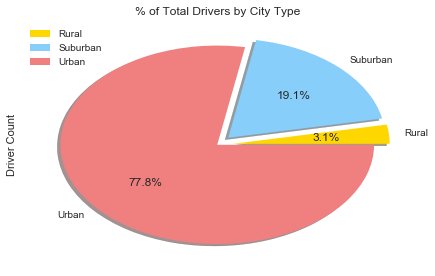

In [40]:
explode_d = []
for item in pie_df['Driver Count']:
    if (item/(pie_df['Driver Count']).sum()*100) < 20:
        explode_d.append(0.1)
    else:
        explode_d.append(0.0)

farebysity = pie_df.plot(kind='pie', y= 'Driver Count', title=('% of Total Drivers by City Type'),
                          colors=['#FFD700', '#87cefa', '#f08080'], autopct="%1.1f%%", shadow=True, startangle=360,
                          center=(0,0), explode = explode_d)
plt.tight_layout()

In [ ]:
#forplot = forplot.assign(Color= '')
# Add copy of allmerged and work with it
#x = 0
#for i in forplot['City Type']:
    #if (i == 'Urban'):
        #forplot.set_value(x, 'Color', 'red')
    #elif (i == 'Suburban'):
        #forplot.set_value(x, 'Color', 'yellow')
    #else:
        #forplot.set_value(x, 'Color', 'green')
    #x +=1
    
#colorlist = ['r','b','g']
#sns.lmplot(x='Number of Rides', y='Average Fare ($)', data=forplot, fit_reg=False, hue='City Type', size = 10,
           #scatter_kws={"s": 100}, palette = colorlist,)
#plt.ylim(15, None)
#plt.xlim(0, None)

#patchlist = []
#for key in citytype:
    #legendkey = mpatches.Circle([], [], radius=6, color=citytype[key], label=key)
    #patchlist.append(legendkey)
#plt.legend(handles=patchlist)